In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# To visualise all of the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Exploratory Data Analysis

In [2]:
# load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


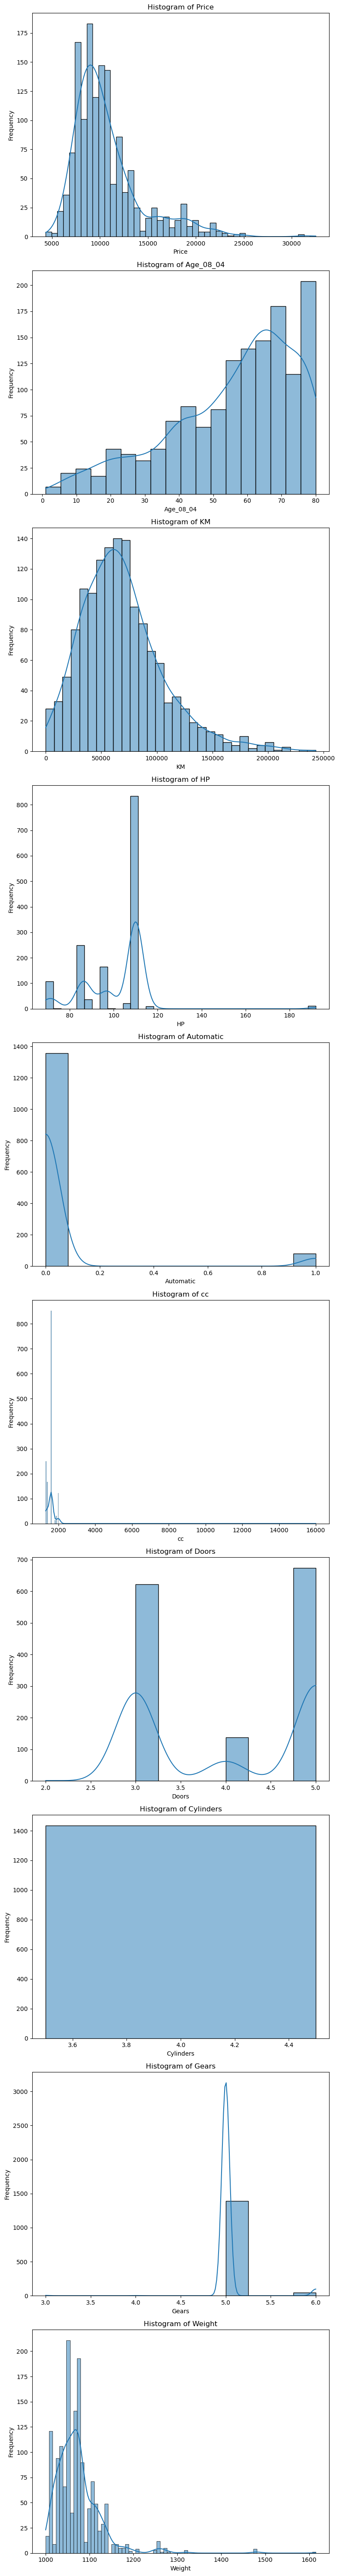

In [3]:
# Select numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Plotting histograms for numerical columns
fig, axs = plt.subplots(len(numerical_cols), 1, figsize=(8, 6*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i], kde=True)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

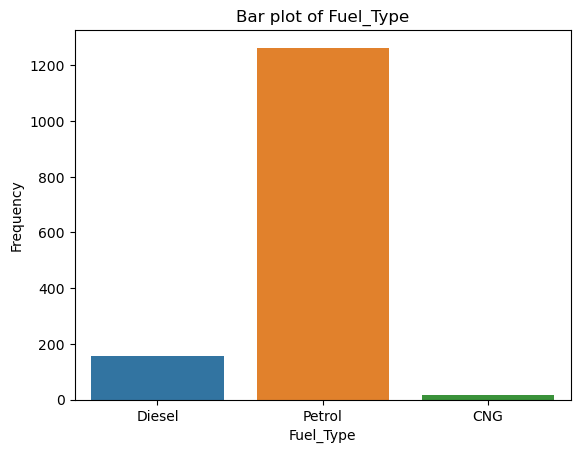

In [4]:

# Plotting bar plot for categorical columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.ylabel('Frequency')
    plt.title(f'Bar plot of {col}')
    plt.show()

In [5]:
# List and no.of columns
print("List of columns: \n", df.columns)
print("\nTotal no.of columns: \n", len(df.columns))

List of columns: 
 Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

Total no.of columns: 
 11


In [6]:
## Check missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
# Convert all categorical variables into numerical values
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])
    
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [8]:
# Calculations for Outliers
Q1 = df.quantile(0.25)
print(f'Q1: {Q1}')
Q3 = df.quantile(0.75)
print(f'Q3: {Q3}')
IQR = Q3 - Q1
print(f'IQR: {IQR}')

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'lower_bound: {lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'upper bound: {upper_bound}')
print()

# Outliers
for col in df.columns:
    df_outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    if not df_outliers.empty:
        print(f"Outlier(s) in column '{col}':")
        print(df_outliers[col])
    else:
        print(f"No outliers in column '{col}'")
print()

# Remove outliers
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna().reset_index(drop=True)
print("No outliers", df_no_outliers)

# Re-assigning to new variable
new_df = df_no_outliers
new_df.head()

Q1: Price         8450.0
Age_08_04       44.0
KM           43000.0
Fuel_Type        2.0
HP              90.0
Automatic        0.0
cc            1400.0
Doors            3.0
Cylinders        4.0
Gears            5.0
Weight        1040.0
Name: 0.25, dtype: float64
Q3: Price        11950.00
Age_08_04       70.00
KM           87020.75
Fuel_Type        2.00
HP             110.00
Automatic        0.00
cc            1600.00
Doors            5.00
Cylinders        4.00
Gears            5.00
Weight        1085.00
Name: 0.75, dtype: float64
IQR: Price         3500.00
Age_08_04       26.00
KM           44020.75
Fuel_Type        0.00
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64
lower_bound: Price         3200.000
Age_08_04        5.000
KM          -23031.125
Fuel_Type        2.000
HP              60.000
Automatic        0.000
cc            1100.000
Doors            0.000
Cylind

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,16750.0,24.0,25563.0,2.0,110.0,0.0,1600.0,3,4,5.0,1065.0
1,16950.0,30.0,64359.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
2,15950.0,30.0,67660.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,15950.0,28.0,56349.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0
4,16950.0,28.0,32220.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


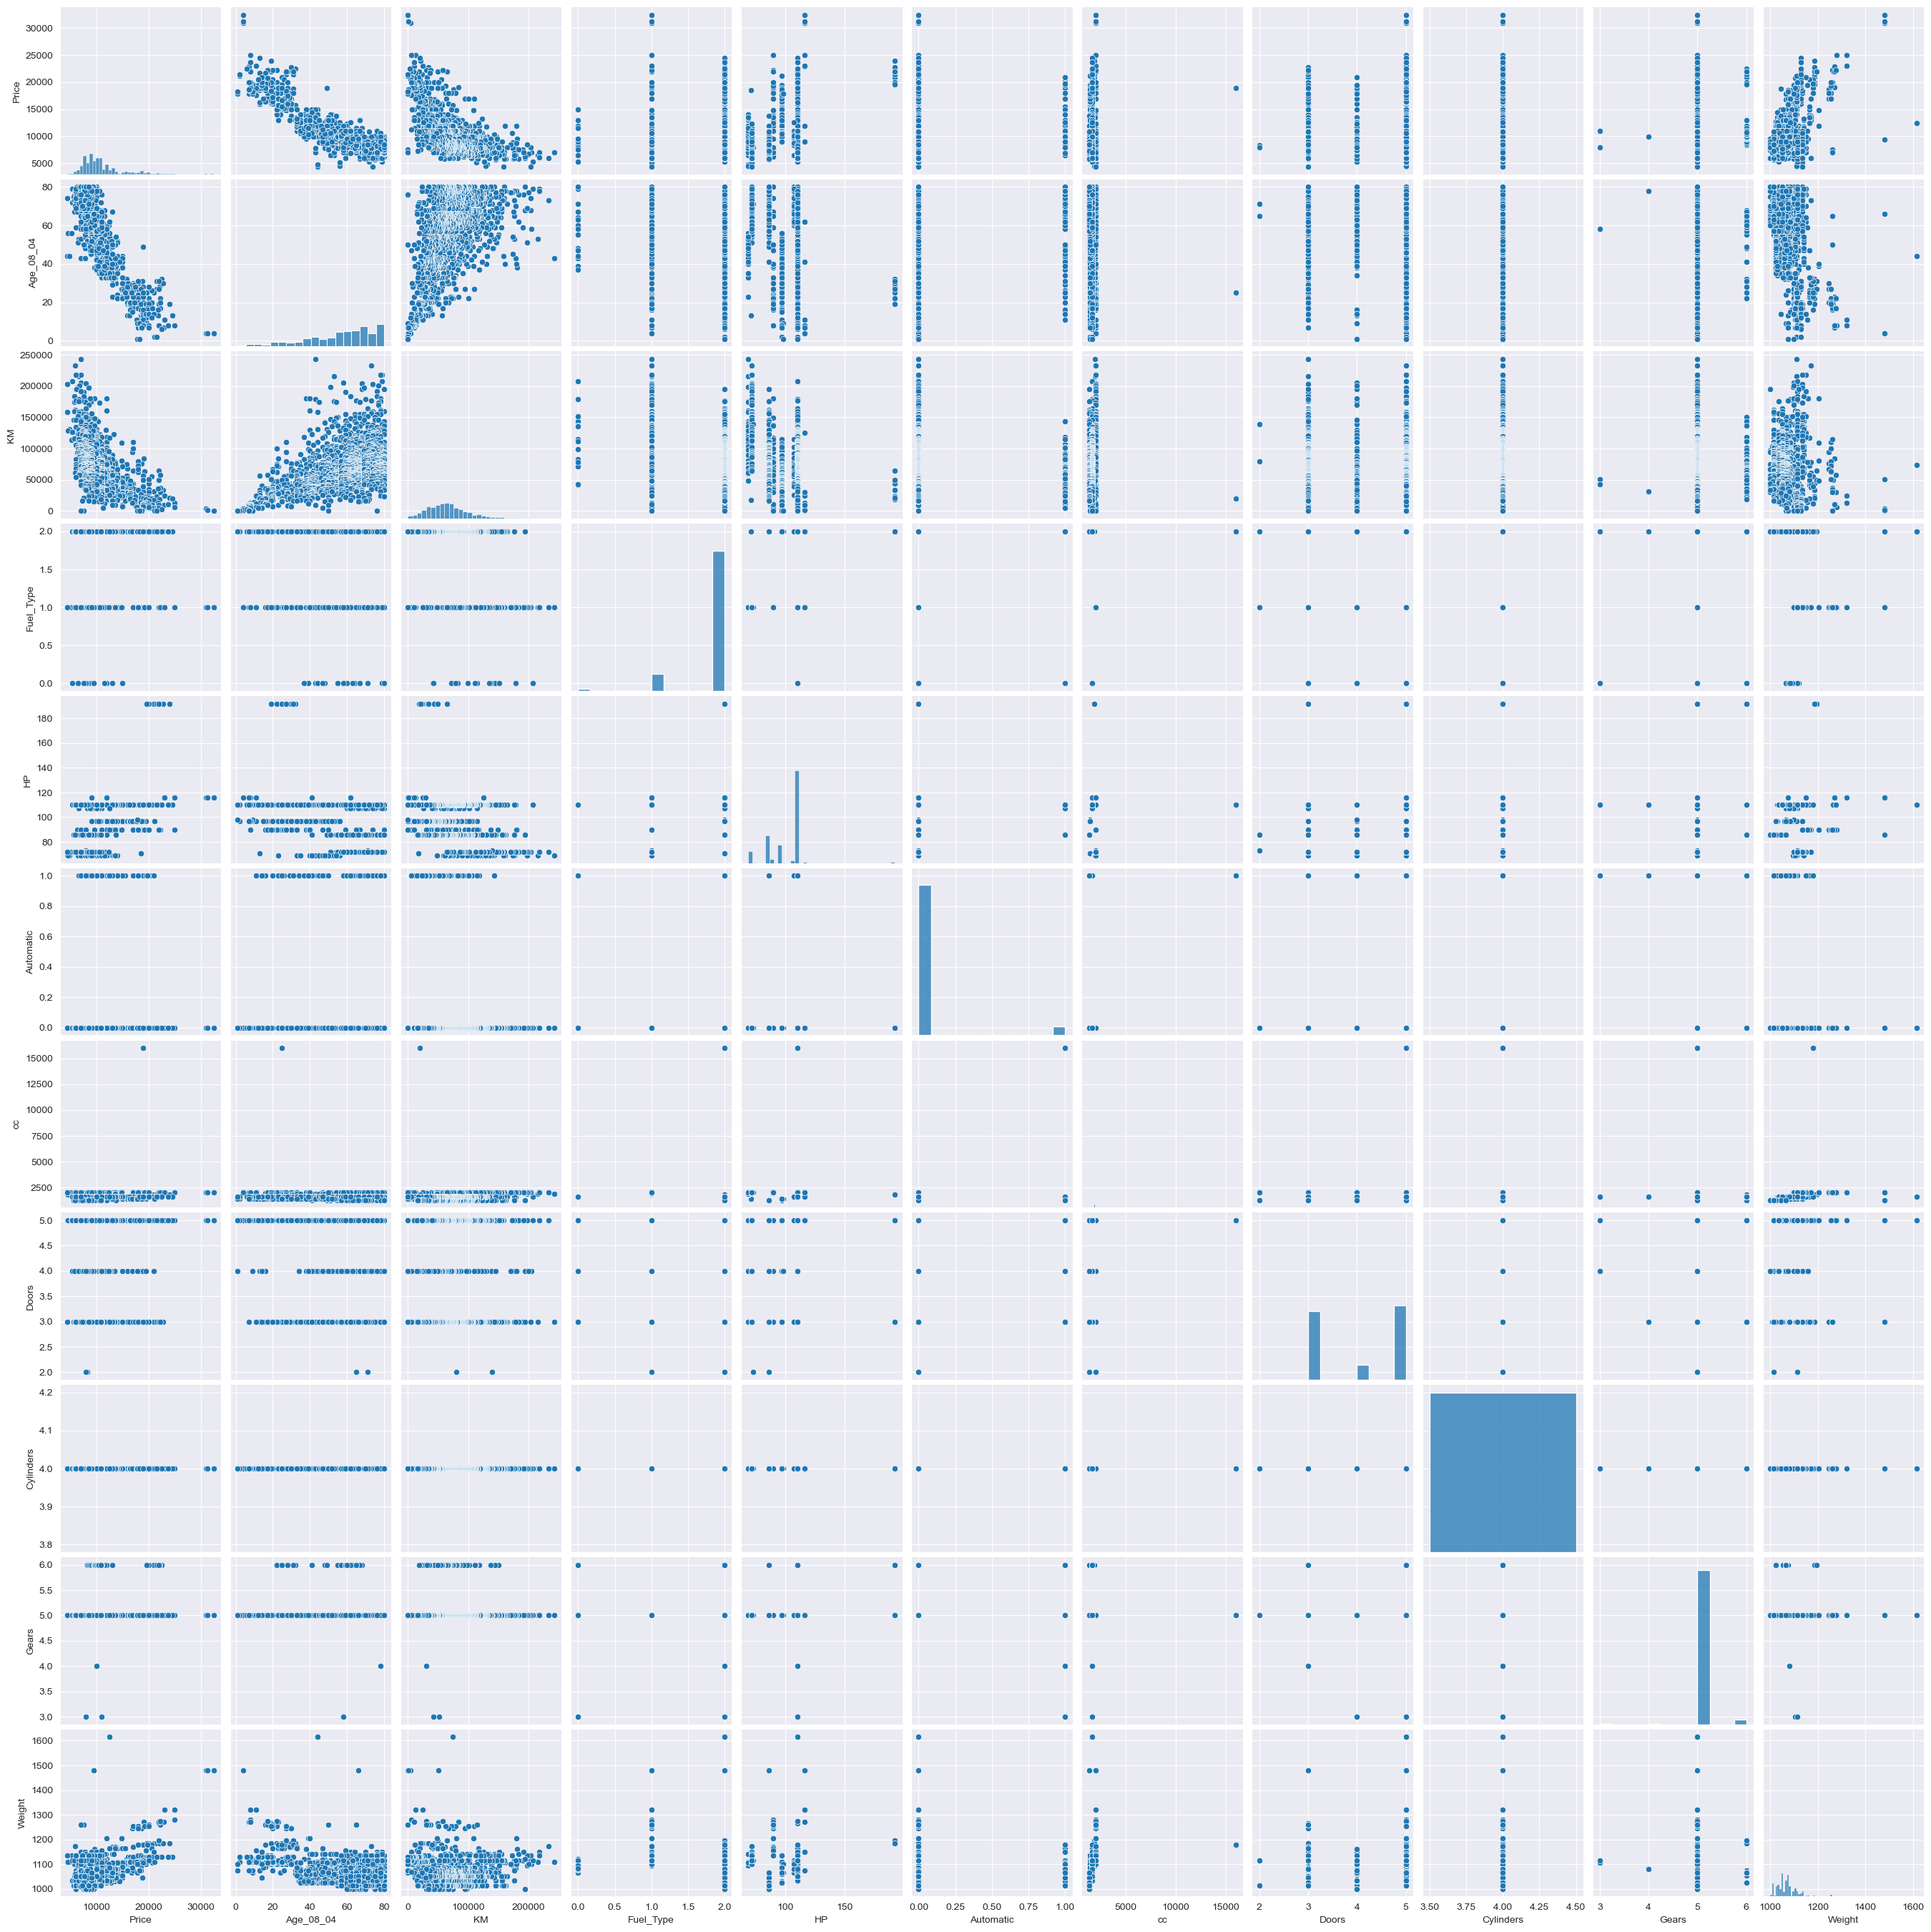

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [10]:
# Remove outliers of present

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

Q1 = numerical_cols.quantile(0.25)
print(f'Q1:\n{Q1}')
Q3 = numerical_cols.quantile(0.75)
print(f'\nQ3:\n{Q3}')
IQR = Q3 - Q1
print(f'\nIQR:\n{IQR}')

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'\nLower Bound:\n{lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'\nUpper Bound:\n{upper_bound}\n')

# Outliers
outliers = {}
for col in numerical_cols.columns:
    numerical_col_outliers = numerical_cols[(numerical_cols[col] < lower_bound[col]) | (numerical_cols[col] > upper_bound[col])]
    if not numerical_col_outliers.empty:
        outliers[col] = numerical_col_outliers[col]
        print(f"Outlier(s) in column '{col}':")
        print(numerical_col_outliers)
    else:
        print(f"No outliers in column '{col}'")

# Remove outliers
numerical_cols_no_outliers = numerical_cols[(numerical_cols >= lower_bound) & (numerical_cols <= upper_bound)].dropna().reset_index(drop=True)
print("\nNo outliers:")
print(numerical_cols_no_outliers)

# Re-assigning to new variable
new_df = numerical_cols_no_outliers
new_df.head()

Q1:
Price         8450.0
Age_08_04       44.0
KM           43000.0
Fuel_Type        2.0
HP              90.0
Automatic        0.0
cc            1400.0
Doors            3.0
Cylinders        4.0
Gears            5.0
Weight        1040.0
Name: 0.25, dtype: float64

Q3:
Price        11950.00
Age_08_04       70.00
KM           87020.75
Fuel_Type        2.00
HP             110.00
Automatic        0.00
cc            1600.00
Doors            5.00
Cylinders        4.00
Gears            5.00
Weight        1085.00
Name: 0.75, dtype: float64

IQR:
Price         3500.00
Age_08_04       26.00
KM           44020.75
Fuel_Type        0.00
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64

Lower Bound:
Price         3200.000
Age_08_04        5.000
KM          -23031.125
Fuel_Type        2.000
HP              60.000
Automatic        0.000
cc            1100.000
Doors            0.000
Cyl

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,16750.0,24.0,25563.0,2.0,110.0,0.0,1600.0,3,4,5.0,1065.0
1,16950.0,30.0,64359.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
2,15950.0,30.0,67660.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,15950.0,28.0,56349.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0
4,16950.0,28.0,32220.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0


In [11]:
# Select numerical columns
numerical_cols = new_df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

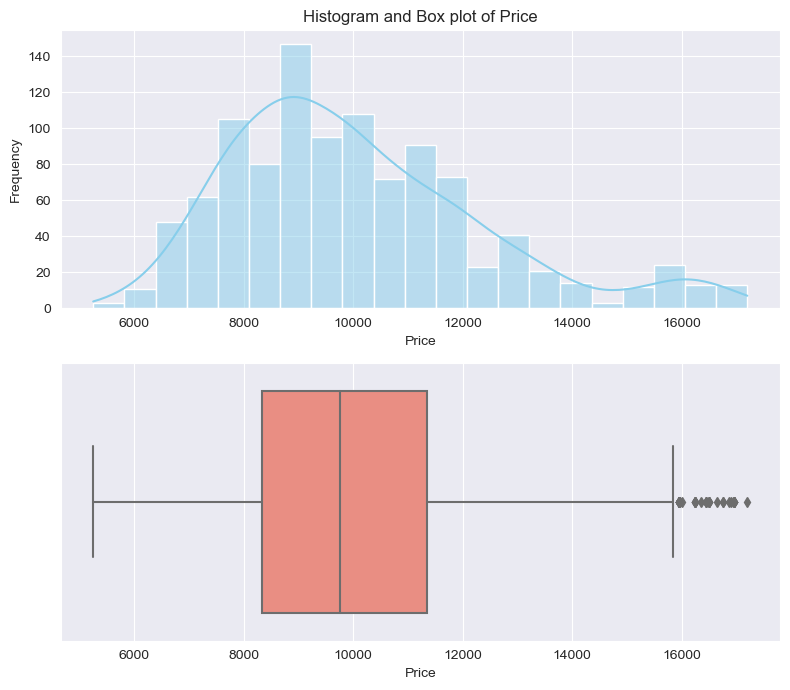

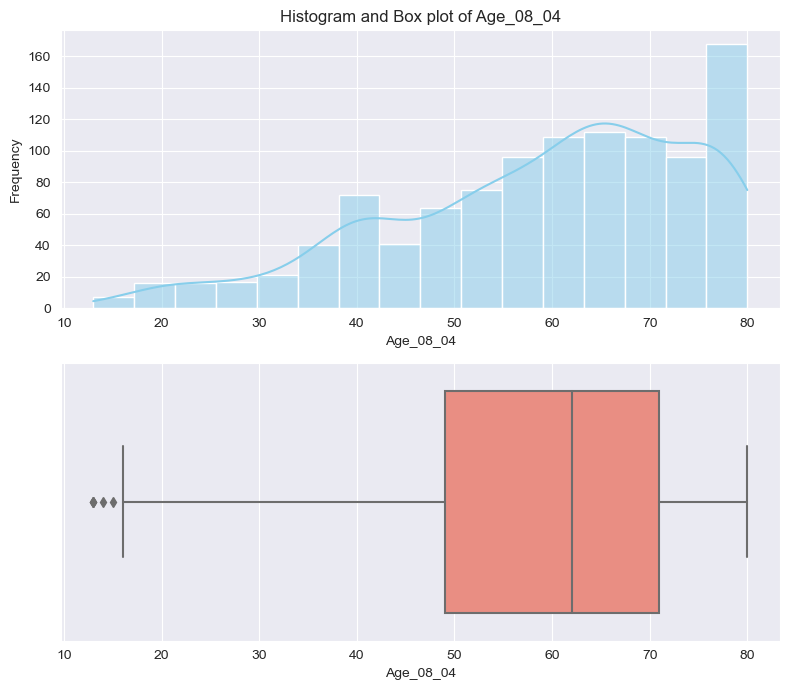

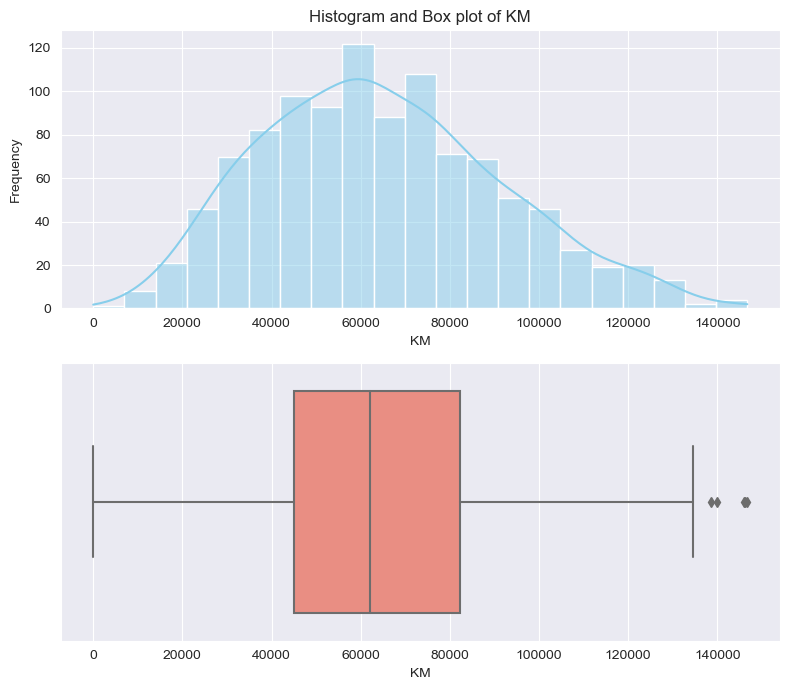

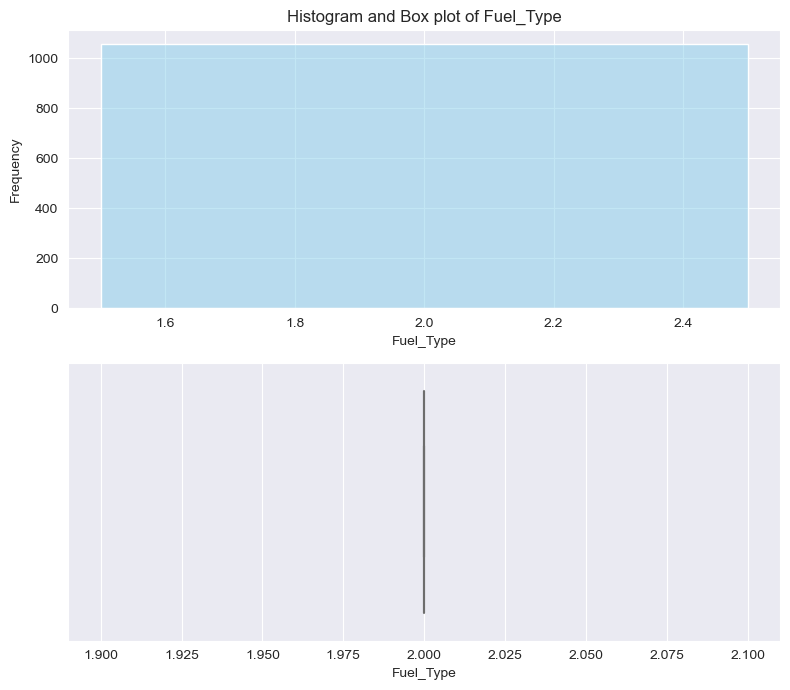

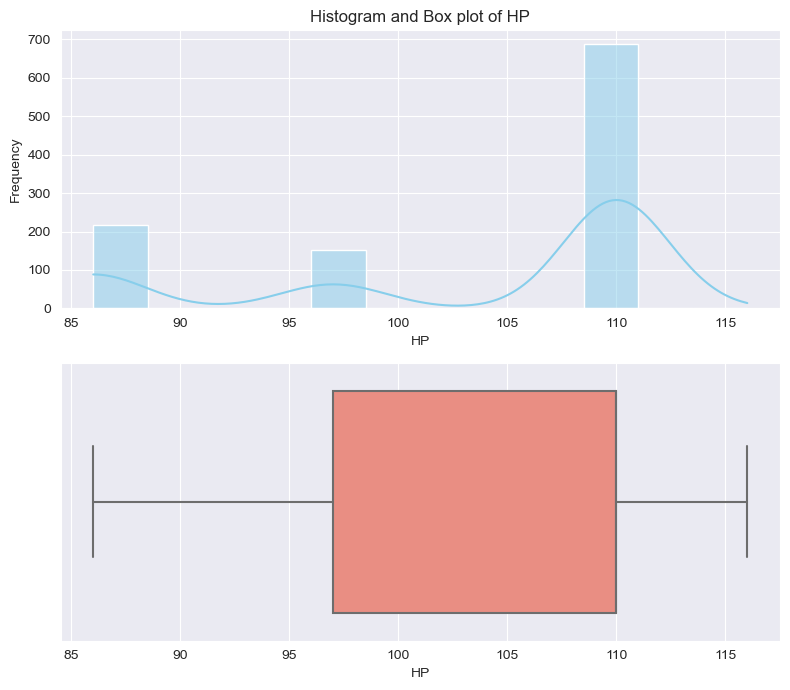

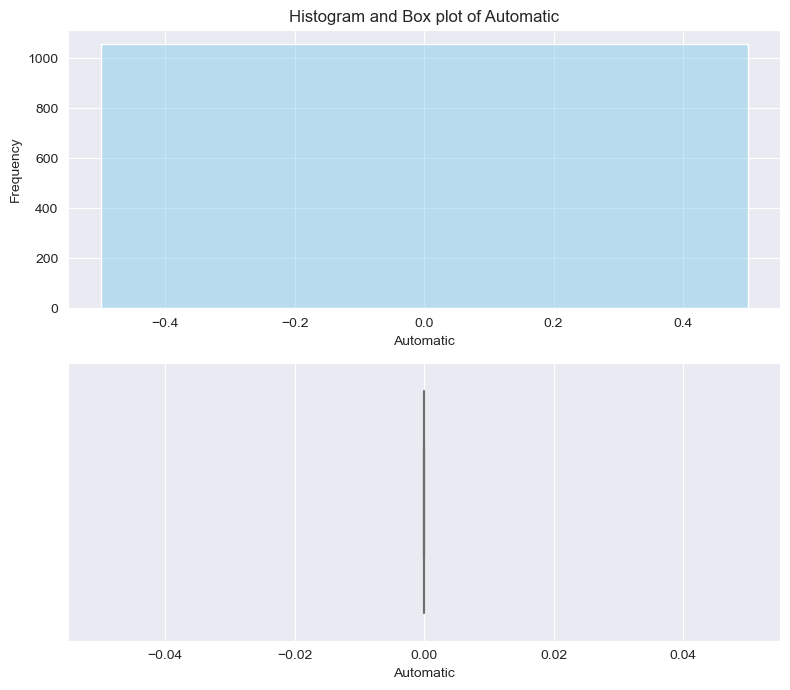

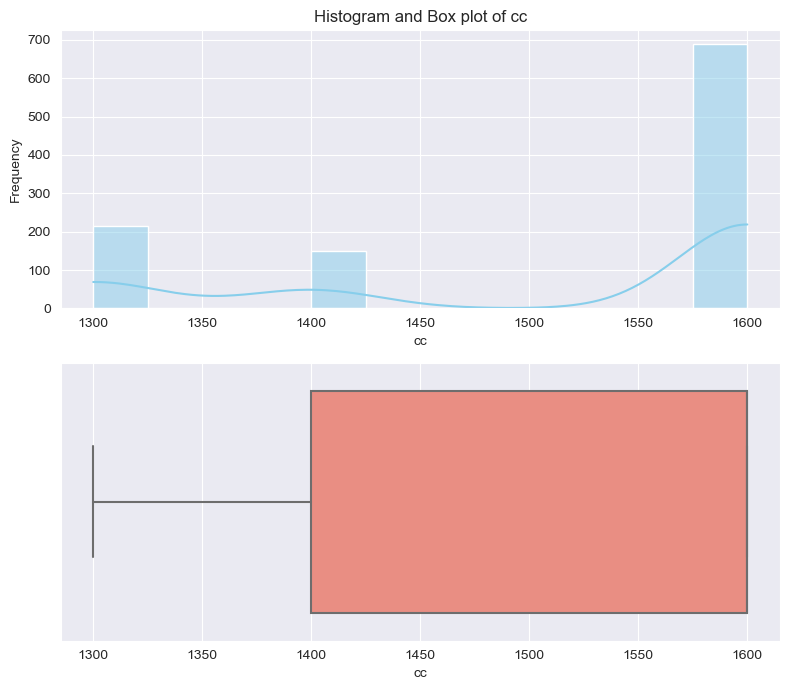

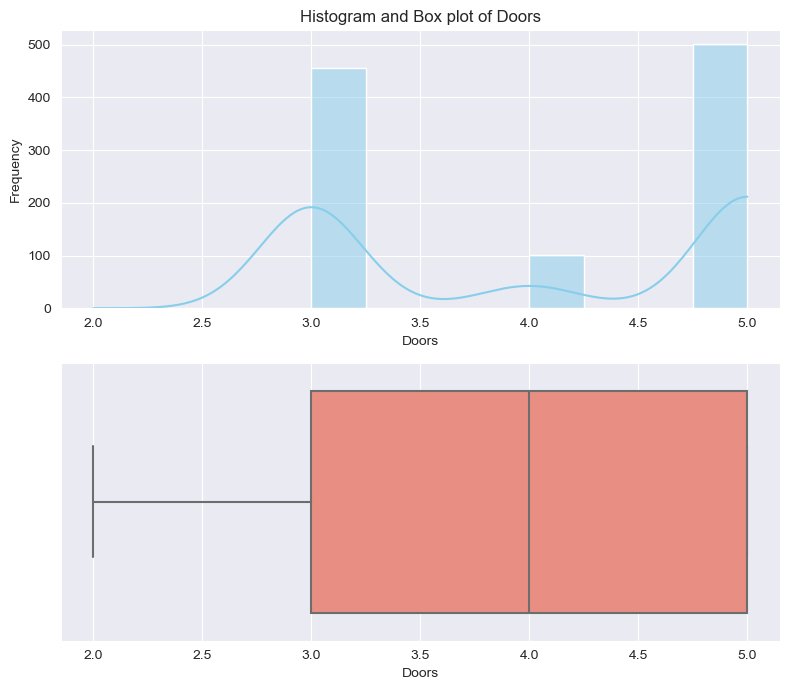

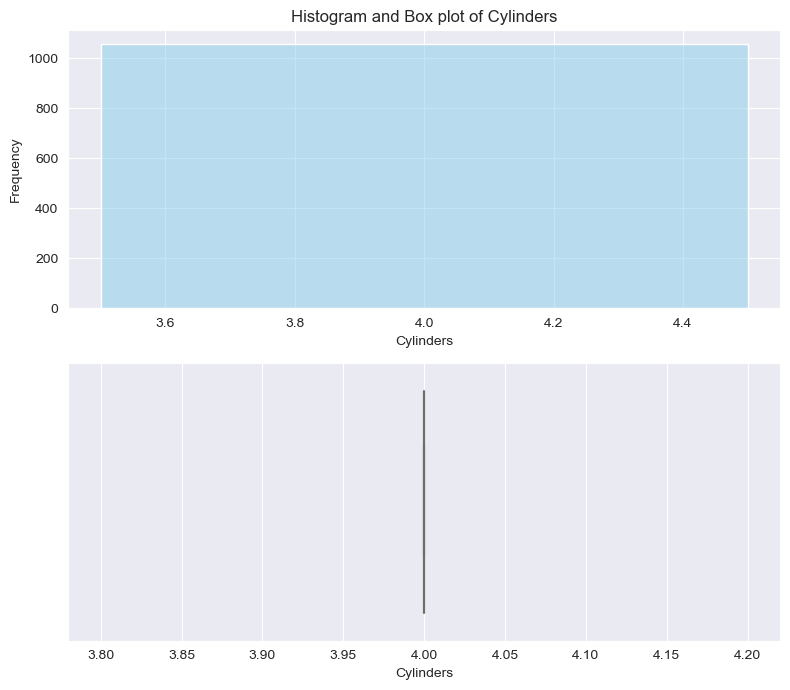

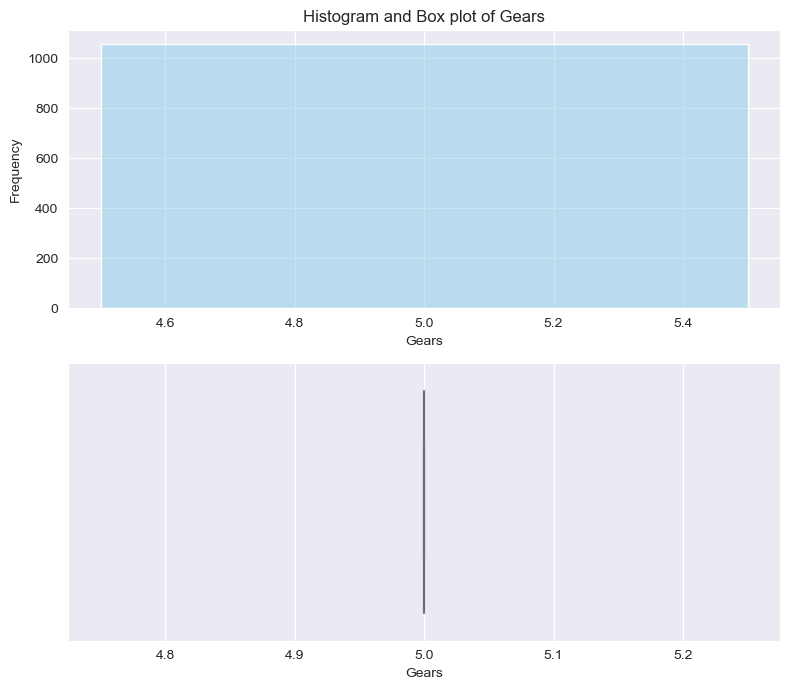

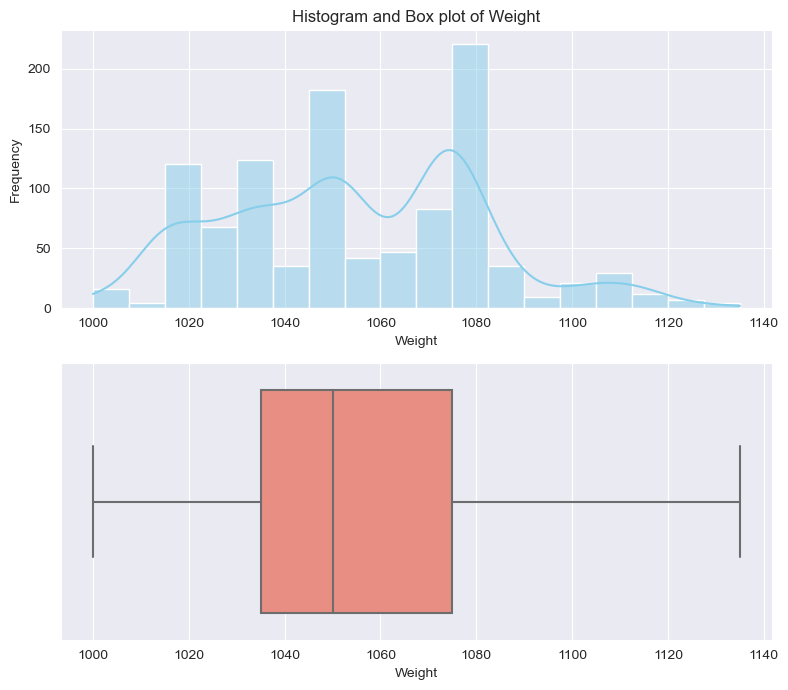

In [12]:
def plot_histogram_boxplot(data, column):
    fig, axs = plt.subplots(2, 1, figsize=(8, 7))
    
    # Histogram
    sns.histplot(data[column], ax=axs[0], kde=True, color='skyblue')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title(f'Histogram and Box plot of {column}')
    
    # Box plot
    sns.boxplot(x=data[column], ax=axs[1], color='salmon')
    axs[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# Plot histogram and box plot for each column one by one
for col in new_df.columns:
    plot_histogram_boxplot(new_df, col)

In [13]:
new_df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,16750.0,24.0,25563.0,2.0,110.0,0.0,1600.0,3,4,5.0,1065.0
1,16950.0,30.0,64359.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
2,15950.0,30.0,67660.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,15950.0,28.0,56349.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0
4,16950.0,28.0,32220.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0


In [14]:
# Statistical Summary
new_df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1059.000000,1059.000000,1059.000000,1059.0,1059.000000,1059.0,1059.000000,1059.000000,1059.0,1059.0,1059.000000
mean,10034.582625,58.969783,64690.442871,2.0,103.232295,0.0,1509.850803,4.042493,4.0,5.0,1054.539188
std,2341.368678,15.561666,26801.545528,0.0,9.809377,0.0,126.645071,0.952108,0.0,0.0,26.726280
min,5250.000000,13.000000,1.000000,2.0,86.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8325.000000,49.000000,45000.000000,2.0,97.000000,0.0,1400.000000,3.000000,4.0,5.0,1035.000000
50%,9750.000000,62.000000,62135.000000,2.0,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1050.000000
75%,11350.000000,71.000000,82255.000000,2.0,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1075.000000
max,17200.000000,80.000000,146736.000000,2.0,116.000000,0.0,1600.000000,5.000000,4.0,5.0,1135.000000


## Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [15]:
# Feature
x = new_df.drop('Price', axis=1)
x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,24.0,25563.0,2.0,110.0,0.0,1600.0,3,4,5.0,1065.0
1,30.0,64359.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
2,30.0,67660.0,2.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,28.0,56349.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0
4,28.0,32220.0,2.0,110.0,0.0,1600.0,3,4,5.0,1120.0


In [16]:
# Target
y = new_df['Price']
y.head()

0    16750.0
1    16950.0
2    15950.0
3    15950.0
4    16950.0
Name: Price, dtype: float64

In [17]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=30)

In [18]:
# Display split dataset
xtrain, xtest, ytrain, ytest

(      Age_08_04        KM  Fuel_Type     HP  Automatic      cc  Doors  \
 152        44.0   39516.0        2.0   97.0        0.0  1400.0      5   
 1011       74.0   56132.0        2.0  110.0        0.0  1600.0      4   
 819        74.0   96302.0        2.0   86.0        0.0  1300.0      3   
 894        78.0   78689.0        2.0  110.0        0.0  1600.0      4   
 909        79.0   75322.0        2.0  110.0        0.0  1600.0      4   
 ...         ...       ...        ...    ...        ...     ...    ...   
 898        77.0   77000.0        2.0   86.0        0.0  1300.0      3   
 919        80.0   74196.0        2.0  110.0        0.0  1600.0      5   
 500        62.0   80265.0        2.0   86.0        0.0  1300.0      3   
 941        78.0   71186.0        2.0  110.0        0.0  1600.0      3   
 421        68.0  112116.0        2.0  110.0        0.0  1600.0      5   
 
       Cylinders  Gears  Weight  
 152           4    5.0  1060.0  
 1011          4    5.0  1035.0  
 819    

## Building Models

In [19]:
# First model

# Create the model
print("Simple Linear Regression:")
lr_simple = LinearRegression()

# Train the model
lr_simple.fit(xtrain, ytrain)

Simple Linear Regression:


LinearRegression()

In [20]:
# Predictions
y_pred_lr_simple = lr_simple.predict(xtest)

In [21]:
# Second model

# Create the model
print("Multiple Linear Regression:")
lr_multiple = LinearRegression()

# Train the model
lr_multiple.fit(xtrain, ytrain)

Multiple Linear Regression:


LinearRegression()

In [22]:
# Predictions
y_pred_lr_multiple = lr_multiple.predict(xtest)

In [23]:
# Third model

# Create the model
print("Polynomial Regression:")
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(xtrain)
x_poly_test = poly.transform(xtest)
lr_poly = LinearRegression()

# Train the model
lr_poly.fit(x_poly_train, ytrain)

Polynomial Regression:


LinearRegression()

In [24]:
# Predictions
y_pred_lr_poly = lr_poly.predict(x_poly_test)

In [25]:
# Coefficients for Multiple Linear Regression
print("Simple Linear Regression Coefficients:")
print(lr_simple.coef_)
print()

# Coefficients for Ridge Regression
print("\n Multiple Linear Regression Coefficients:")
print(lr_multiple.coef_)
print()

# Coefficients for Lasso Regression
print("\n Polynomial Linear Regression Coefficients:")
print(lr_poly.coef_)

Simple Linear Regression Coefficients:
[-1.10757314e+02 -1.24900735e-02 -2.50466314e-13 -9.63259903e+01
 -1.42108547e-14  6.71139119e+00 -4.05890965e+01  0.00000000e+00
  0.00000000e+00  2.34828522e+01]


 Multiple Linear Regression Coefficients:
[-1.10757314e+02 -1.24900735e-02 -2.50466314e-13 -9.63259903e+01
 -1.42108547e-14  6.71139119e+00 -4.05890965e+01  0.00000000e+00
  0.00000000e+00  2.34828522e+01]


 Polynomial Linear Regression Coefficients:
[-2.43393280e-04  1.64701563e+01 -4.09804640e-03 -4.46889894e-07
 -4.67931763e+01  4.55086113e-08  3.95935666e+00 -7.18641384e+01
 -6.46143590e-08  8.15188270e-08  5.29891871e+00 -1.72859728e-01
  3.96142002e-04  3.29403748e+01  3.15758813e+00 -1.08549366e-08
 -2.79950067e-01  1.75751864e+01  6.58807496e+01  8.23509371e+01
 -7.95278879e-01 -8.60175753e-08 -8.19693844e-03  3.62680472e-03
  2.84217094e-13 -2.96652788e-04 -2.72027338e-03 -1.63938769e-02
 -2.04923473e-02  2.35933014e-04  0.00000000e+00 -9.35863527e+01
  0.00000000e+00  7.918

## Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [26]:
# Calculate and print evaluation metrics for Simple Linear Regression
mse_lr_simple = mean_squared_error(ytest, y_pred_lr_simple)
r2_lr_simple = r2_score(ytest, y_pred_lr_simple)
print("Simple Linear Regression:")
print("MSE:", mse_lr_simple)
print("R-squared:", r2_lr_simple)
print()

# Calculate and print evaluation metrics for Multiple Linear Regression
mse_lr_multiple = mean_squared_error(ytest, y_pred_lr_multiple)
r2_lr_multiple = r2_score(ytest, y_pred_lr_multiple)
print("Multiple Linear Regression:")
print("MSE:", mse_lr_multiple)
print("R-squared:", r2_lr_multiple)
print()

# Calculate and print evaluation metrics for Polynomial Regression
mse_lr_poly = mean_squared_error(ytest, y_pred_lr_poly)
r2_lr_poly = r2_score(ytest, y_pred_lr_poly)
print("Polynomial Regression:")
print("MSE:", mse_lr_poly)
print("R-squared:", r2_lr_poly)
print()

Simple Linear Regression:
MSE: 892320.4234534095
R-squared: 0.8009332227746523

Multiple Linear Regression:
MSE: 892320.4234534095
R-squared: 0.8009332227746523

Polynomial Regression:
MSE: 903363.2851215553
R-squared: 0.7984696829678243



In [27]:
# Ridge Regression for Multiple Linear Regression
print("Ridge Regression for Multiple Linear Regression:")
ridge_multiple = Ridge(alpha=1.0)
ridge_multiple.fit(xtrain, ytrain)
print("Coefficients:", ridge_multiple.coef_)
print()

# Lasso Regression for Multiple Linear Regression
print("Lasso Regression for Multiple Linear Regression:")
lasso_multiple = Lasso(alpha=1.0)
lasso_multiple.fit(xtrain, ytrain)
print("Coefficients:", lasso_multiple.coef_)
print()

# Include predictions for Ridge and Lasso Regularized Multiple Linear Regression models
y_pred_ridge_multiple = ridge_multiple.predict(xtest)
y_pred_lasso_multiple = lasso_multiple.predict(xtest)

Ridge Regression for Multiple Linear Regression:
Coefficients: [-1.10752793e+02 -1.24901489e-02  0.00000000e+00 -9.61719039e+01
  0.00000000e+00  6.69974991e+00 -4.04864959e+01  0.00000000e+00
  0.00000000e+00  2.34795170e+01]

Lasso Regression for Multiple Linear Regression:
Coefficients: [-1.10722301e+02 -1.24907617e-02  0.00000000e+00 -9.47532529e+01
  0.00000000e+00  6.59373332e+00 -3.86555549e+01  0.00000000e+00
  0.00000000e+00  2.34245314e+01]



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.958e+07, tolerance: 4.846e+05
  model = cd_fast.enet_coordinate_descent(


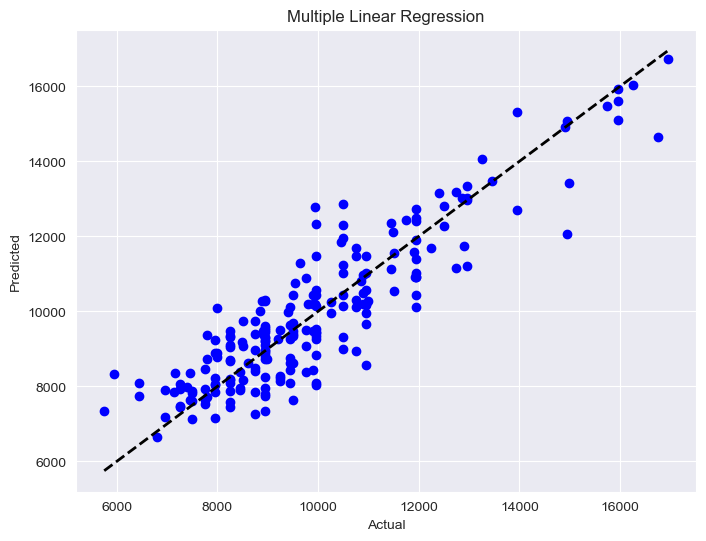

In [40]:
# Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_lr_multiple, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], '--k', linewidth=2)
plt.title('Multiple Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()